In [1]:
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.compute as pc
import h5py
from src.benchmarkers import *
from src.benchmarkersV2 import *
import time
from tqdm import tqdm
from matplotlib import pyplot as plt
np.random.seed(0)

In [ ]:
#def print_name(name):
#    print(name)
#
#with h5py.File(r"C:\Users\Cristiano Lavoro\Desktop\benchmarks\outputs\v2\32\ds_10_core.h5", "r") as file:
#    file.visit(print_name)
#    image1 = np.array(file["example_0/image_feature/image1/boundingbox_feature/bb1/image_1_feature/image"][:])
#
#table = pq.read_table(r"C:\Users\Cristiano Lavoro\Desktop\benchmarks\outputs\v2\32\ds_10.parquet")
#image2 = np.array(table.column("image_feature").chunk(0).values.field("boundingbox_feature").values.field("image_1_feature").values.field("image").to_pylist())
#image2np = np.frombuffer(image2[0], dtype=np.float64).reshape(3, 32, 32)
#image1 == image2np

In [21]:
N = [10,100,200,300,500]
dim = 32
selected_label = 10
iterations = 100

In [3]:
generator = Generator()

### Generation

In [10]:
#for item in tqdm(N):
#    generator.create_dataset(item,f"outputs/v2/{dim}/ds_{item}",dim)
#    generator.create_arrow_file(f"outputs/v2/{dim}/ds_{item}")
#    generator.create_arrow_stream(f"outputs/v2/{dim}/ds_{item}")

100%|██████████| 5/5 [07:53<00:00, 94.61s/it] 


In [16]:
arrow_file_memory = ClockRowWise().benchmark_arrow(f"outputs/v2/{dim}/ds",N,iterations,dim,selected_label,memory=True,stream=False)
arrow_stream_memory = ClockRowWise().benchmark_arrow(f"outputs/v2/{dim}/ds",N,iterations,dim,selected_label,memory=True,stream=True)
arrow_file_no_memory = ClockRowWise().benchmark_arrow(f"outputs/v2/{dim}/ds",N,iterations,dim,selected_label,memory=False,stream=False)
arrow_stream_no_memory = ClockRowWise().benchmark_arrow(f"outputs/v2/{dim}/ds",N,iterations,dim,selected_label,memory=False,stream=True)
arrow_parquet = ClockRowWise().benchmark_parquet(f"outputs/v2/{dim}/ds",N,iterations,selected_label,dim)
hdf5_core = ClockRowWise().benchmark_hdf5(f"outputs/v2/{dim}/ds",N,iterations,selected_label,hdf5_driver="core")
hdf5_sec2 = ClockRowWise().benchmark_hdf5(f"outputs/v2/{dim}/ds",N,iterations,selected_label,hdf5_driver="sec2")

100%|██████████| 100/100 [00:23<00:00,  4.31it/s]


In [7]:
#arrow_file_memory = ClockColumnWise().benchmark_arrow(f"outputs/v2/test/column_wise_{dim}/ds",N,iterations,dim,memory=True,stream=False)
#arrow_stream_memory = ClockColumnWise().benchmark_arrow(f"outputs/v2/test/column_wise_{dim}/ds",N,iterations,dim,memory=True,stream=True)
#arrow_file_no_memory = ClockColumnWise().benchmark_arrow(f"outputs/v2/test/column_wise_{dim}/ds",N,iterations,dim,memory=False,stream=False)
#arrow_stream_no_memory = ClockColumnWise().benchmark_arrow(f"outputs/v2/test/column_wise_{dim}/ds",N,iterations,dim,memory=False,stream=True)
#arrow_parquet = ClockColumnWise().benchmark_parquet(f"outputs/v2/test/column_wise_{dim}/ds",N,iterations,dim)
#hdf5_core = ClockColumnWise().benchmark_hdf5(f"outputs/v2/test/column_wise_{dim}/ds",N,iterations,hdf5_driver="core")
#hdf5_sec2 = ClockColumnWise().benchmark_hdf5(f"outputs/v2/test/column_wise_{dim}/ds",N,iterations,hdf5_driver="sec2")

In [17]:
t_load_arrow_file_memory = arrow_file_memory.t_load
t_load_arrow_stream_memory = arrow_stream_memory.t_load
t_load_arrow_file_no_memory = arrow_file_no_memory.t_load
t_load_arrow_stream_no_memory = arrow_stream_no_memory.t_load
t_load_arrow_parquet = arrow_parquet.t_load
t_load_hdf5_core = hdf5_core.t_load
t_load_hdf5_sec2 = hdf5_sec2.t_load

t_access_arrow_file_memory = arrow_file_memory.t_access
t_access_arrow_stream_memory = arrow_stream_memory.t_access
t_access_arrow_file_no_memory = arrow_file_no_memory.t_access
t_access_arrow_stream_no_memory = arrow_stream_no_memory.t_access
t_access_arrow_parquet = arrow_parquet.t_access
t_access_hdf5_core = hdf5_core.t_access
t_access_hdf5_sec2 = hdf5_sec2.t_access

t_manipulate_arrow_file_memory = arrow_file_memory.t_manipulate
t_manipulate_arrow_stream_memory = arrow_stream_memory.t_manipulate
t_manipulate_arrow_file_no_memory = arrow_file_no_memory.t_manipulate
t_manipulate_arrow_stream_no_memory = arrow_stream_no_memory.t_manipulate
t_manipulate_arrow_parquet = arrow_parquet.t_manipulate
t_manipulate_hdf5_core = hdf5_core.t_manipulate
t_manipulate_hdf5_sec2 = hdf5_sec2.t_manipulate

In [18]:
np.save("t_load_arrow_file_memory",t_load_arrow_file_memory)
np.save("t_load_arrow_stream_memory",t_load_arrow_stream_memory)
np.save("t_load_arrow_file_no_memory",t_load_arrow_file_no_memory)
np.save("t_load_arrow_stream_no_memory",t_load_arrow_stream_no_memory)
np.save("t_load_arrow_parquet",t_load_arrow_parquet)
np.save("t_load_hdf5_core",t_load_hdf5_core)
np.save("t_load_hdf5_sec2",t_load_hdf5_sec2)

np.save("t_manipulate_arrow_file_memory",t_manipulate_arrow_file_memory)
np.save("t_manipulate_arrow_stream_memory",t_manipulate_arrow_stream_memory)
np.save("t_manipulate_arrow_file_no_memory",t_manipulate_arrow_file_no_memory)
np.save("t_manipulate_arrow_stream_no_memory",t_manipulate_arrow_stream_no_memory)
np.save("t_manipulate_arrow_parquet",t_manipulate_arrow_parquet)
np.save("t_manipulate_hdf5_core",t_manipulate_hdf5_core)
np.save("t_manipulate_hdf5_sec2",t_manipulate_hdf5_sec2)

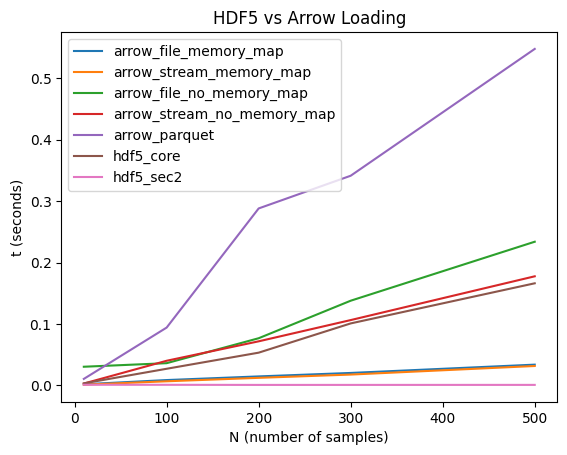

In [19]:
plt.title("HDF5 vs Arrow Loading")
plt.plot(N, t_load_arrow_file_memory, label="arrow_file_memory_map")
plt.plot(N, t_load_arrow_stream_memory, label="arrow_stream_memory_map")
plt.plot(N, t_load_arrow_file_no_memory, label="arrow_file_no_memory_map")
plt.plot(N, t_load_arrow_stream_no_memory, label="arrow_stream_no_memory_map")
plt.plot(N, t_load_arrow_parquet, label="arrow_parquet")
plt.plot(N, t_load_hdf5_core, label="hdf5_core")
plt.plot(N, t_load_hdf5_sec2, label="hdf5_sec2")

# Add a legend
plt.legend()

# Add titles and labels
plt.xlabel("N (number of samples)")
plt.ylabel("t (seconds)")

# Show the plot
plt.savefig(f'load.pdf')  # Save as PDF

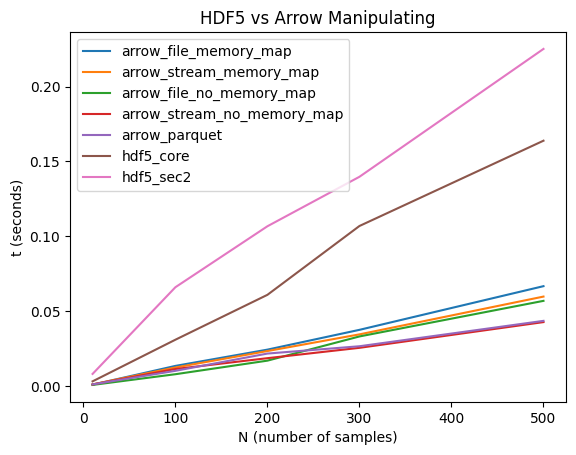

In [20]:
plt.title("HDF5 vs Arrow Manipulating")
plt.plot(N, t_manipulate_arrow_file_memory, label="arrow_file_memory_map")
plt.plot(N, t_manipulate_arrow_stream_memory, label="arrow_stream_memory_map")
plt.plot(N, t_manipulate_arrow_file_no_memory, label="arrow_file_no_memory_map")
plt.plot(N, t_manipulate_arrow_stream_no_memory, label="arrow_stream_no_memory_map")
plt.plot(N, t_manipulate_arrow_parquet, label="arrow_parquet")
plt.plot(N, t_manipulate_hdf5_core, label="hdf5_core")
plt.plot(N, t_manipulate_hdf5_sec2, label="hdf5_sec2")

# Add a legend
plt.legend()

# Add titles and labels
plt.xlabel("N (number of samples)")
plt.ylabel("t (seconds)")

# Show the plot
plt.savefig(f'manipulating.pdf')  # Save as PDF